## **Data Cleaning (Handling Missing Values and Outliers)**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### **Importing the data (after removing duplicates)**

In [22]:
df = pd.read_csv('Data (No Duplicates).csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Order Year,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,2016,6-16-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,10-11-2015,2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Order Year     9994 non-null   int64  
 4   Ship Date      9994 non-null   object 
 5   Ship Mode      9994 non-null   object 
 6   Customer ID    9994 non-null   object 
 7   Customer Name  9994 non-null   object 
 8   Segment        9994 non-null   object 
 9   Country        9994 non-null   object 
 10  City           9994 non-null   object 
 11  State          9994 non-null   object 
 12  Postal Code    9994 non-null   int64  
 13  Region         9994 non-null   object 
 14  Product ID     9994 non-null   object 
 15  Category       9994 non-null   object 
 16  Sub-Category   9994 non-null   object 
 17  Product Name   9994 non-null   object 
 18  Sales   

In [24]:
df.shape

(9994, 22)

In [26]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Year', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

##### **Checking for presence of null values**

In [27]:
df.isna()

,Row ID,Order ID,Order Date,Order Year,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### **Number of null values in each column**

In [28]:
df.isna().sum()

Row ID             0
Order ID           0
Order Date         0
Order Year         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales            156
Quantity         101
Discount          80
Profit           120
dtype: int64

##### **Heatmap to represent the presence of null values**

<Axes: >

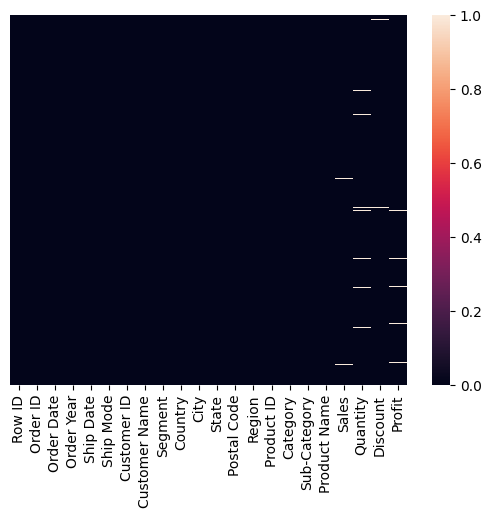

In [29]:
sns.heatmap(df.isna(), yticklabels=False)

##### **Amount of null values present using bar chart**

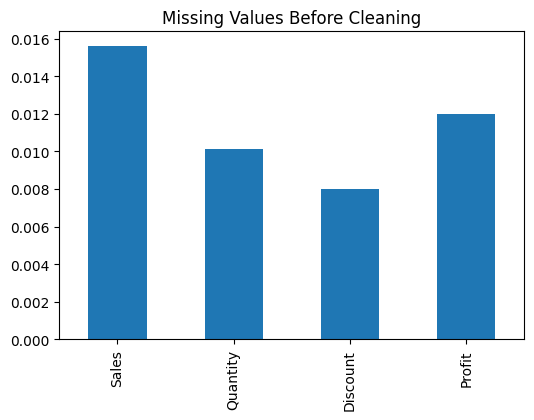

In [30]:
missing_data_before = df.isnull().sum() / len(df)
missing_data_before = missing_data_before[missing_data_before > 0]
missing_data_before.plot(kind='bar', figsize=(6,4))
plt.title('Missing Values Before Cleaning')
plt.show()


##### **Distribution of null values and outliers using boxplot**

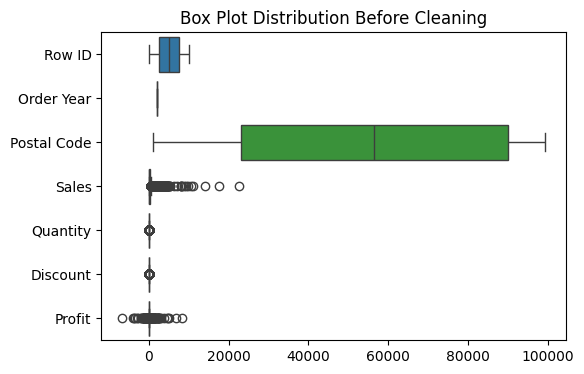

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h")
plt.title('Box Plot Distribution Before Cleaning')
plt.show()

### **Filling the null values**

##### **Sales - Mean Imputation**

In [34]:
df['Sales'].fillna(df['Sales'].mean(), inplace=True)

##### **Profit - Median Imputation**

In [35]:
df['Profit'].fillna(df['Profit'].median(), inplace=True)

##### **Quantity - Forward Fill Method**

In [39]:
df['Quantity'].fillna(method='ffill', inplace=True)

C:\Users\thali\AppData\Local\Temp\ipykernel_6196\507412060.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Quantity'].fillna(method='ffill', inplace=True)


##### **Discount - Backward Fill Method**

In [40]:
df['Discount'].fillna(method='bfill', inplace=True)

C:\Users\thali\AppData\Local\Temp\ipykernel_6196\242846795.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Discount'].fillna(method='bfill', inplace=True)


##### **Number of null values in each column (after cleaning)**

In [41]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Order Year       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### **Removing Outliers**

##### **Sales - Inter-Quartile Range Method**

In [43]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

##### **Quantity - Inter-Quartile Range Method**

In [44]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

##### **Profit - Z-Score Method**

In [46]:
from scipy import stats

threshold = 3
z_scores = stats.zscore(df['Profit'])
df = df[abs(z_scores) < threshold]

##### **Discount - Z-Score Method**

In [47]:
from scipy import stats

threshold = 3
z_scores = stats.zscore(df['Discount'])
df = df[abs(z_scores) < threshold]

##### **Heatmap to represent the presence of null values (after cleaning)**

<Axes: >

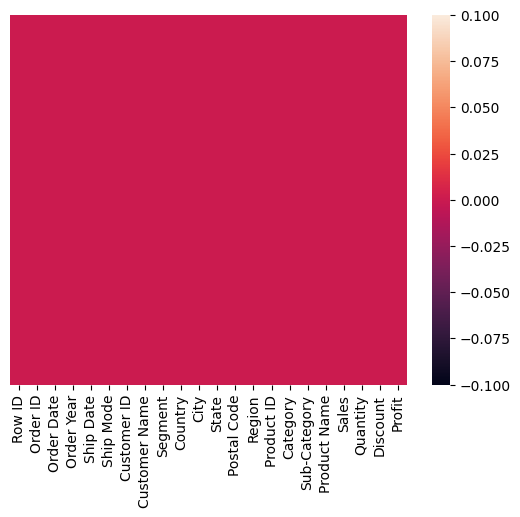

In [48]:
sns.heatmap(df.isna(), yticklabels=False)

##### **Amount of null values present using bar chart (after cleaning)**

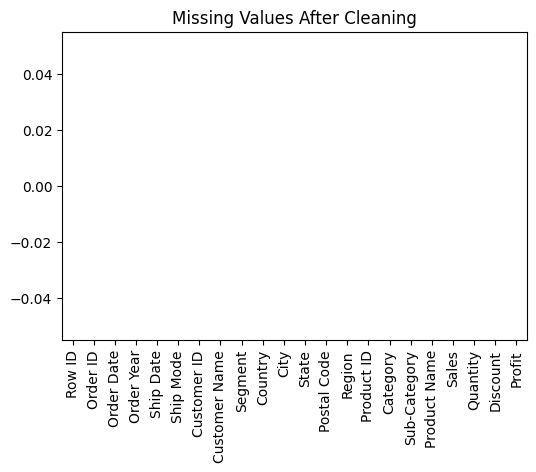

In [49]:
missing_data_after = df.isnull().sum() / len(df)
missing_data_after.plot(kind='bar', figsize=(6,4))
plt.title('Missing Values After Cleaning')
plt.show()

##### **Distribution of null values and outliers using boxplot (after cleaning)**

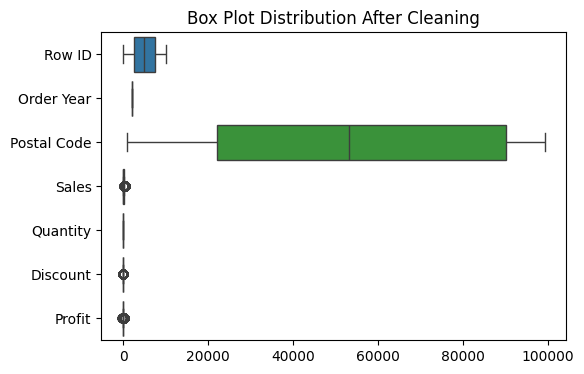

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h")
plt.title('Box Plot Distribution After Cleaning')
plt.show()

##### **Assigning the data to 'Sample - Superstore.csv' file**

In [51]:
df.to_csv('Sample - Superstore.csv', index=False)